# Imports

In [184]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

# Get data

In [185]:
data_json_path = "./data.json"
numbers = {}
countries = {}

with open(data_json_path, "r") as file:
    data = json.loads(file.read())

    for creation_myth in data["creation_myths"]:
        country = creation_myth["country"]
        countries[country] = countries.get(country, 0) + 1
        for number, occurence in creation_myth["stats"]["numbers"].items():
            numbers[number] = numbers.get(number, 0) + occurence

# Plot occurence of numbers

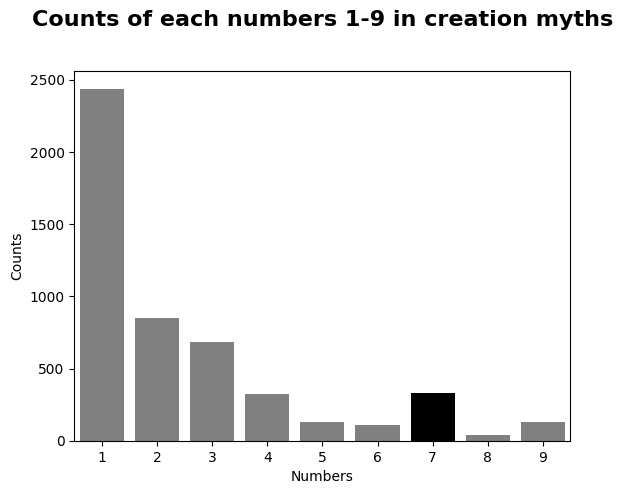

In [186]:
# Extracting values for keys 0 to the limit
limit = 10
values = [numbers.get(str(key), 0) for key in range(1, limit)]

# Keys ranging from 0 to limit
keys = list(range(1, limit))
colors = ['gray' if x != 7 else 'black' for x in keys]

plt.bar(keys, values, color=colors)

plt.xticks(range(limit))
plt.xlim(0.5, limit - 0.5)

plt.title('Counts of each numbers 1-9 in creation myths', fontsize=16, fontweight="bold", y=1.1)
plt.xlabel('Numbers')
plt.ylabel('Counts')

plt.show()

# Plot probability to see each number

In [187]:
data_json_path = "./data.json"
numbers = defaultdict(int)
total = 0

with open(data_json_path, "r") as file:
    data = json.loads(file.read())

    for creation_myth in data["creation_myths"]:
        total += 1
        for number in creation_myth["stats"]["numbers"].keys():
            numbers[number] += 1

for key in numbers:
    numbers[key] /= total

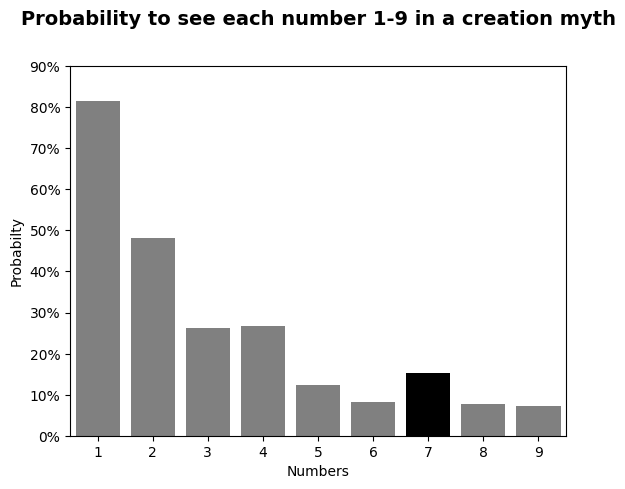

In [188]:
# Extracting values for keys 0 to the limit

limit = 10
values = [numbers.get(str(key), 0) for key in range(1, limit)]

# Keys ranging from 0 to the limit
keys = list(range(1, limit))
colors = ['gray' if x != 7 else 'black' for x in keys]
plt.bar(keys, values, color=colors)

plt.xticks(range(limit))
plt.xlim(0.5, limit - 0.5)

# Create custom y-axis tick labels as percentages
y_ticks = [f'{int(y * 100)}%' for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_ticks)

plt.title('Probability to see each number 1-9 in a creation myth', fontsize=14, fontweight="bold", y=1.09)
plt.xlabel('Numbers')
plt.ylabel('Probabilty')

plt.show()

# Plot countries of origin

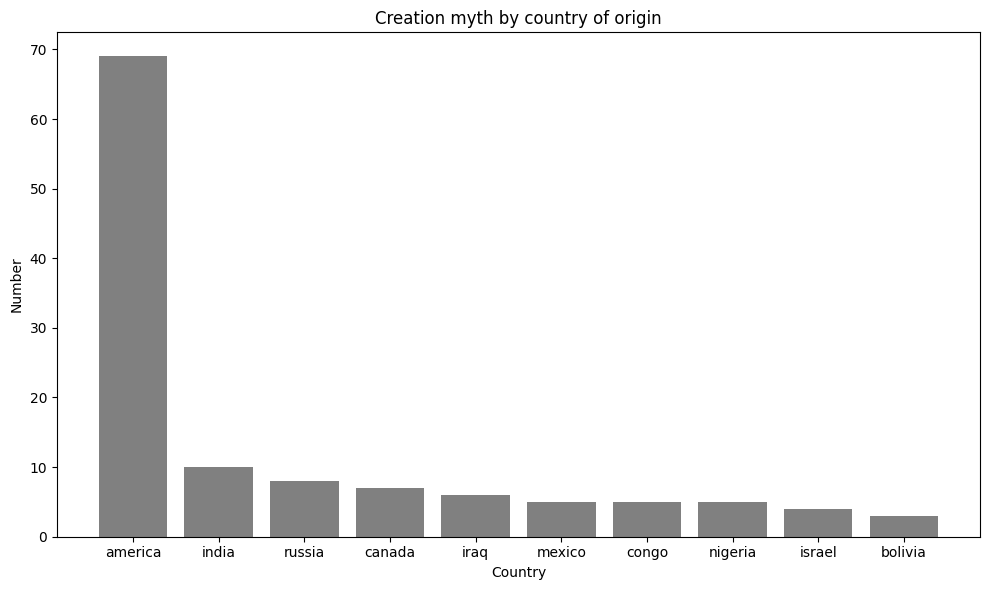

In [189]:
sorted_countries = dict(sorted(countries.items(), key=lambda item: item[1], reverse=True))

# Extract the top countries and their corresponding values
top_countries = list(sorted_countries.keys())[:10]
top_values = list(sorted_countries.values())[:10]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_countries, top_values, color="gray")
plt.xlabel('Country')
plt.ylabel('Number')
plt.title('Creation myth by country of origin')

# Display the plot
plt.tight_layout()
plt.show()
